In [23]:
import numpy as np
import pandas as pd
from ISLP import load_data
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA,
     QuadraticDiscriminantAnalysis as QDA)
from ISLP import confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score


In [11]:
Auto = load_data('Auto')
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [12]:
Auto['mpg01'] = np.where(Auto['mpg'] > Auto['mpg'].median(), 1, 0)
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0
ford torino,17.0,8,302.0,140,3449,10.5,70,1,0


In [13]:
Auto = Auto.drop('mpg', axis=1)
Auto.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,
chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,8,304.0,150,3433,12.0,70,1,0
ford torino,8,302.0,140,3449,10.5,70,1,0


(b)

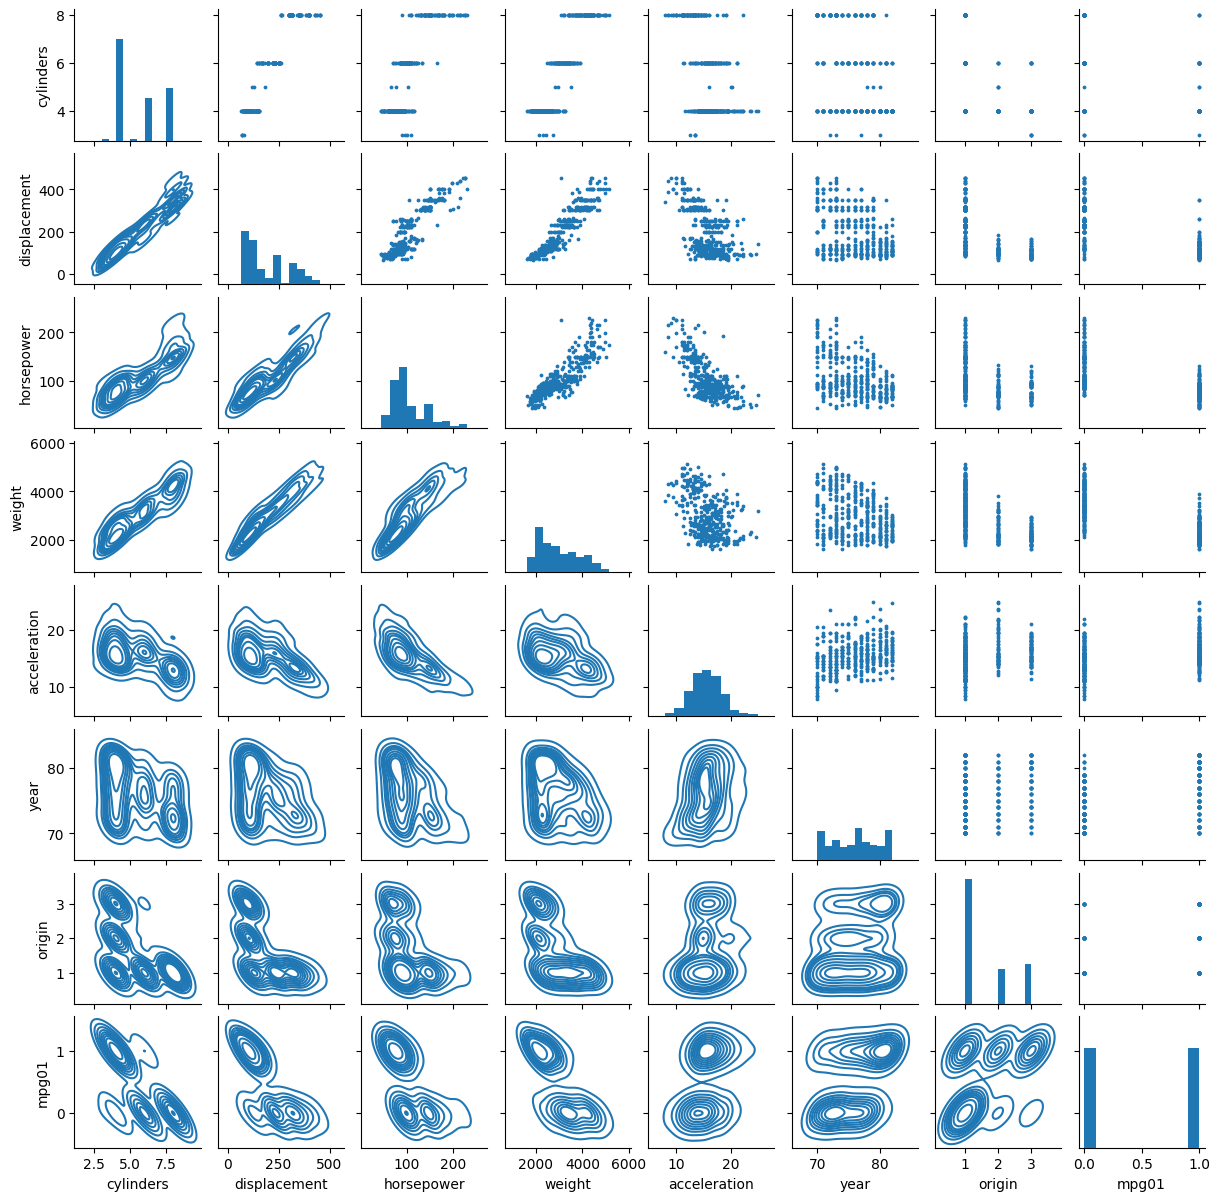

In [18]:
grid = sns.PairGrid(Auto)
grid.map_upper(plt.scatter, s=3)
grid.map_diag(plt.hist)
grid.map_lower(sns.kdeplot)
grid.fig.set_size_inches(12, 12)

In [19]:
Auto.corr()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


Examining both the visualization and correlation data, we can observe that mpg01 has strong relationships with several predictors. The variables cylinders, displacement, and weight show particularly strong correlations with our binary mpg indicator. We'll focus on these three variables for our modeling approaches.

(c)

In [20]:
features = Auto[['cylinders', 'displacement', 'weight']].values
target = Auto['mpg01'].values
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

(f)

In [26]:
logmodel = LogisticRegression()
logmodel.fit(features_train, target_train)
accuracy_score(target_test, logmodel.predict(features_test))

0.9387755102040817

(h)

In [31]:
for neighbor_count in range(1,200):
    knn_model = KNeighborsClassifier(n_neighbors=neighbor_count)
    knn_model.fit(features_train, target_train)
    prediction_accuracy = accuracy_score(target_test, knn_model.predict(features_test))
    print('K = {:3}, accuracy = {:.4f}'.format(neighbor_count, prediction_accuracy))

K =   1, accuracy = 0.8469
K =   2, accuracy = 0.8776
K =   3, accuracy = 0.8673
K =   4, accuracy = 0.8776
K =   5, accuracy = 0.8571
K =   6, accuracy = 0.8878
K =   7, accuracy = 0.8776
K =   8, accuracy = 0.9082
K =   9, accuracy = 0.8980
K =  10, accuracy = 0.8878
K =  11, accuracy = 0.9082
K =  12, accuracy = 0.9082
K =  13, accuracy = 0.9184
K =  14, accuracy = 0.9082
K =  15, accuracy = 0.8980
K =  16, accuracy = 0.8980
K =  17, accuracy = 0.8878
K =  18, accuracy = 0.9184
K =  19, accuracy = 0.9082
K =  20, accuracy = 0.9184
K =  21, accuracy = 0.9082
K =  22, accuracy = 0.9082
K =  23, accuracy = 0.9082
K =  24, accuracy = 0.9184
K =  25, accuracy = 0.9082
K =  26, accuracy = 0.9184
K =  27, accuracy = 0.9184
K =  28, accuracy = 0.9184
K =  29, accuracy = 0.9184
K =  30, accuracy = 0.9184
K =  31, accuracy = 0.9184
K =  32, accuracy = 0.9184
K =  33, accuracy = 0.9082
K =  34, accuracy = 0.9082
K =  35, accuracy = 0.8980
K =  36, accuracy = 0.9082
K =  37, accuracy = 0.8980
K

13,18,20,24,26,27,28,29,30,31,32